# Homework 1 - Numerical programming & Regression

## *Ran Ju*
Netid: rj133

Instructions for homework assignments can be found on Sakai under lessons.

# 1) Getting started with NumPy
### (1 Point)
Consider the following table of data that provides the values of a discrete data vector $\mathbf{x}$ of samples from the random variable $X$, where each entry in $\mathbf{x}$ is given as $x_i$.

*Table 1. Dataset N=5 observations*

|        | $x_0$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ |
|------  |-------|-------|-------|-------|-------|
|$\textbf{x}$| 2     | 3     | 10    | -1    | -1    |

Use NumPy to compute the (a) mean, (b) variance, and (c) median of the data. 

*Your answer should include the definition of mean, median, and variance in the context of discrete data.*

**ANSWER**

a) mean = $\frac{1}{n}\sum_{i=0}^{n} {x_i}$

b) variance = $\frac{1}{n}\sum_{i=0}^{n} {(x_i-mean)^2}$

c) if an array of number is listed in order from smallest to greatest, when there is an odd number of numbers, the median is the middle number; when there is an even number of numbers, the median is the mean of two middle numbers.

In [2]:
#imprt the library and set the array of data
import numpy as np
data=[2,3,10,-1,-1]

#calculate mean variance and median
mean=np.mean(data)
variance=np.var(data)
median=np.median(data)

print('The mean of the data is '+str(mean))
print('The variance of the data is '+str(variance))
print('The median of the data is '+str(median))

The mean of the data is 2.6
The variance of the data is 16.240000000000002
The median of the data is 2.0


# 2) Some basic numerical programming
### (2 points total)

1. Synthesize $n=10^4$ normally distributed data points with mean $\mu=2$ and a standard deviation of $\sigma=1$. Call the vector of observations that you generate, $\textbf{x}$. (*0.5 points*)
2. Calculate the mean and standard deviation of $\textbf{x}$ to validate (1) and provide the result to a precision of four significant figures. (*0.5 points*)
3. Plot a histogram of the data in $\textbf{x}$ with 30 bins (*0.5 points*)
4. What is the 90th percentile of $\textbf{x}$? The 90th percentile is the value below which 90% of observations can be found. (*0.5 points*)

**ANSWER**

In [3]:
#1. Synthesize data points
x=np.random.normal(2,1,10000)

In [4]:
#2. Calculate mean and standard deviation
mean=float('{0:.3f}'.format(np.mean(x)))
std=float('{0:.3f}'.format(np.std(x)))
print('The mean is '+str(mean))
print('The error of mean is '+'{0:.3f}'.format(abs((mean-2)/2)))
print('The standard deviation is '+str(std))
print('The error of standard deviation is '+'{0:.3f}'.format(abs((std-1)/1)))

The mean is 2.008
The error of mean is 0.004
The standard deviation is 1.0
The error of standard deviation is 0.000


Text(0, 0.5, 'show times y')

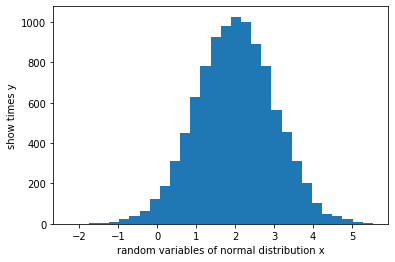

In [5]:
#3. Plot the data
from matplotlib import pyplot as plt
%matplotlib inline
%config lnlineBackend.figure_format = 'retina'

plt.hist(x,bins=30)
plt.xlabel('random variables of normal distribution x')
plt.ylabel('show times y')

In [6]:
#4 calculate 90th percentile
per90=np.percentile(x, 90)
print('the 90th percentitle of the data is '+str(per90))

the 90th percentitle of the data is 3.2991642380901025


# 3) Speed comparison between vectorized and non-vectorized code
### (2 points total)
Begin by creating an array of 10 million random numbers using the numpy random.randn module. Compute the sum of the squares first in a for loop (*0.5 points*), then using Numpy's `dot` module (*0.5 points*). 

[Time how long it takes](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) to compute each version and report the results. 
How many times faster is the vectorized code than the for loop approach? (*1 point*)  

**ANSWER**

In [7]:
size=10000000
data=np.random.randn(size)


In [19]:
import time
start=time.time()
sumsquare=0
for i in range(size):
    sumsquare+=data[i]**2
end=time.time()
fortime=end-start

In [20]:
start1=time.time()
datat=data[::1]
sumsquare1=np.dot(data,datat)
end1=time.time()
dottime=end1-start1

In [21]:
print('sum of the square with for loop is '+str(sumsquare))
print('sum of the square with numpy.dot is '+str(sumsquare1))

sum of the square with for loop is 9995743.816760506
sum of the square with numpy.dot is 9995743.816760426


In [22]:
print('time use for loop: '+str(fortime)+'ms')
print('time use numpy.dot: '+str(dottime)+'ms')

time use for loop: 4.85455322265625ms
time use numpy.dot: 0.0039980411529541016ms


In [23]:
print('The vectorized code is '+str(fortime/dottime)+' times faster than the for loop approach.')

The vectorized code is 1214.2329298109607 times faster than the for loop approach.


# 4) linear regression and nonlinear transformations.
### (5 points total)

Together with this notebook you will find training and testing data contained in files "H1_train.csv" and "H1_test.csv". Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data. (*0.5 points*)

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. (*1 point*)

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data. (*1 point*)

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line). (*0.5 points*)

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.  (*1 point*)

**(f)** Which models perform better on the training data, and which on the test data? Why?
(*0.5 points*)

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why? (*0.5 points*)

**ANSWER**

In [25]:
import pandas as pd

In [26]:
train=pd.read_csv('./H1_train.csv')
train=train.drop('Unnamed: 0',axis=1)
train.head()

,x,y
0,-0.254599,45.835580
1,5.507143,68.448152
2,3.319939,-0.951031
3,1.986585,-4.024992
4,-2.439814,-16.374826


In [27]:
test=pd.read_csv('./H1_test.csv')
tes=test.drop('Unnamed: 0',axis=1)
test.head()

,Unnamed: 0,x,y
0,0,4.925590,43.457301
1,1,1.393422,7.250231
2,2,4.074402,-35.916978
3,3,4.960913,37.753777
4,4,-0.819965,32.540487


Text(0, 0.5, 'target value y')

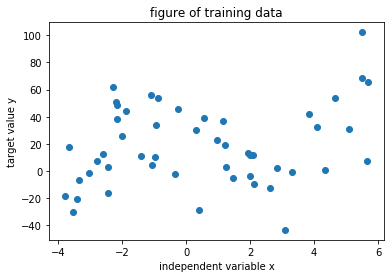

In [28]:
trainx=train.loc[:,'x']
trainy=train.loc[:,'y']
#1 Create a scatter plot of training data
%config lnlineBackend.figure_format = 'retina'
plt.scatter(trainx,trainy)
plt.title('figure of training data')
plt.xlabel('independent variable x')
plt.ylabel('target value y')

In [29]:
from sklearn.linear_model import LinearRegression,Perceptron
from sklearn.metrics import mean_squared_error,r2_score
reg=LinearRegression()
trainx=trainx.values.reshape(-1,1)
trainy=trainy.values.reshape(-1,1)
reg.fit(trainx,trainy)#pay attention that series cannot be reshaped
trainypredict=reg.predict(trainx)
r2score=r2_score(trainy,trainypredict)
print('R^2 of the training data is '+str(r2score))
mse=np.sqrt(mean_squared_error(trainy,trainypredict))
print('Mean square error of the training data is '+str(mse))
print('Coefficient a1 is '+str(reg.coef_))
print('Coefficient a0 is '+str(reg.intercept_))

R^2 of the training data is 0.06486123304769709
Mean square error of the training data is 28.132130156995053
Coefficient a1 is [[2.59072826]]
Coefficient a0 is [17.20492818]


$ y=17.20492818+2.59072826x $


In [30]:
import math
traintx=[]
for i in trainx:
    for j in i:
        traintx.append([j,j**2,j**3])

In [31]:
regt=LinearRegression()
regt.fit(traintx,trainy)
trainytpredict=regt.predict(traintx)
r2scoret=r2_score(trainy,trainytpredict)
print('R^2 of the training data is '+str(r2scoret))
mset=np.sqrt(mean_squared_error(trainy,trainytpredict))
print('Mean square error of the training data is '+str(mset))
print('Coefficient a1, a2 and a3 are '+str(regt.coef_))
print('Coefficient a0 is '+str(regt.intercept_))

R^2 of the training data is 0.3963378411290073
Mean square error of the training data is 22.6027646837884
Coefficient a1 is [[-9.25191526 -2.12568583  0.89700921]]
Coefficient a0 is [24.15543416]


$y=24.15543416-9.25191526x-2.12568583x^2+0.89700921x^3 $

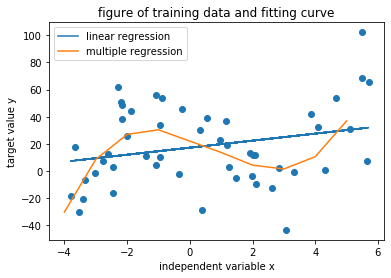

In [32]:
import matplotlib.pyplot as plt
import scikitplot as skplt
%config lnlineBackend.figure_format = 'retina'
plt.scatter(trainx,trainy)
plt.plot(trainx,trainypredict,label='linear regression')
yrt=[]
yr=[]
xr=[]
a=np.arange(-4,6)
for x in a:
    if x!=0:
        xr.append(x)
        yrt.append(24.15543416-9.25191526*x-2.12568583*x**2+0.89700921*x**3)
        yr.append(17.20492818+2.59072826*x)

plt.plot(xr,yrt,label='multiple regression')
plt.title('figure of training data and fitting curve')
plt.xlabel('independent variable x')
plt.ylabel('target value y')
plt.legend()

In [36]:
testx=test['x'].values.reshape(-1,1)
testy=test['y'].values.reshape(-1,1)
testypredict=reg.predict(testx)
r2test=r2_score(testy,testypredict)
print('R^2 of the test data use linear regression is '+str(r2test))
msetest=np.sqrt(mean_squared_error(testy,testypredict))
print('Mean square error of the test data use linear regression is '+str(msetest))

testxt=[]
for i in testx:
    for j in i:
        testxt.append([j,j**2,j**3])
testytpredict=regt.predict(testxt)
r2testt=r2_score(testy,testytpredict)
print('R^2 of the test data use multiple regression is '+str(r2testt))
msetestt=np.sqrt(mean_squared_error(testy,testytpredict))
print('Mean square error of the test data use multiple regression is '+str(msetestt))

R^2 of the test data use linear regression is -0.13289928472598378
Mean square error of the test data use linear regression is 33.416511436139
R^2 of the test data use multiple regression is 0.2294538470854115
Mean square error of the test data use multiple regression is 27.559084479256


The multiple regression model is better, beecause it has gigger $R^2$ score and smaller mean square error which means it has smaller errors.

The predictive capability of your model will be decreased. Since the model only fits the data points that follow certain rule, when the test data are ssignificantly different from the training data, the mean value of loss function will be very large which means the low predictive ability of the model.